In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
df = pd.read_csv("lanzhou.csv", encoding='GBK')

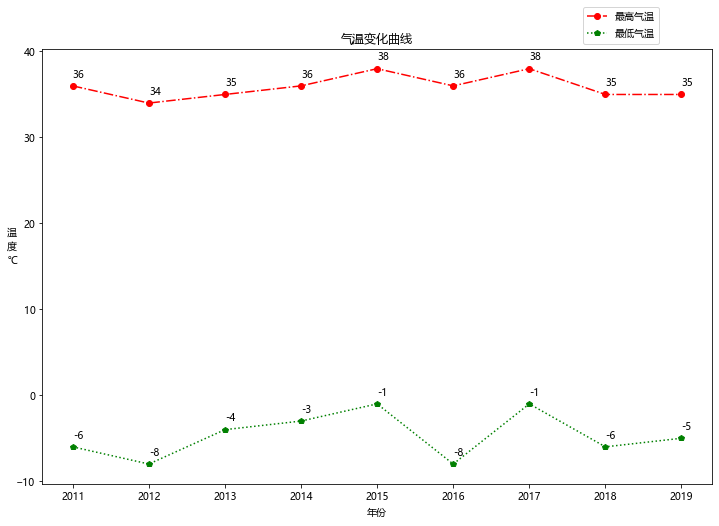

In [26]:
DATE = df['日期'].values.tolist()
MAX = df['最高气温'].values.tolist()
MIN = df['最高气温'].values.tolist()

# print(DATE, MAX, MIN, sep="\n")
YEAR = [i for i in range(2011, 2020)]
MAX_YEAR = [[] for _ in range(2011, 2020)]
MIN_YEAR = [[] for _ in range(2011, 2020)]
high, low = [], []

for i in range(len(DATE)):
    year = int(DATE[i][3])
    mx = int(MAX[i][:-1])
    mn = int(MIN[i][:-1])
    MAX_YEAR[year - 1].append(mx)
    MIN_YEAR[year - 1].append(mn)

for h, l in zip(MAX_YEAR, MIN_YEAR):
    high.append(max(h))
    low.append(min(l))

plt.figure(figsize=(12, 8))
plt.title("气温变化曲线")
plt.ylabel("温\n度\n℃", rotation=0)
plt.xlabel("年份")
plt.xticks(YEAR, YEAR)
plt.plot(YEAR, high, 'r-.o')
plt.plot(YEAR, low, 'g:p')

for x in range(len(YEAR)):
    plt.text(YEAR[x], high[x] + 1, high[x])
    plt.text(YEAR[x], low[x] + 1, low[x])
plt.legend(["最高气温", "最低气温"], loc=3, bbox_to_anchor=(0.8, 1))
plt.show()

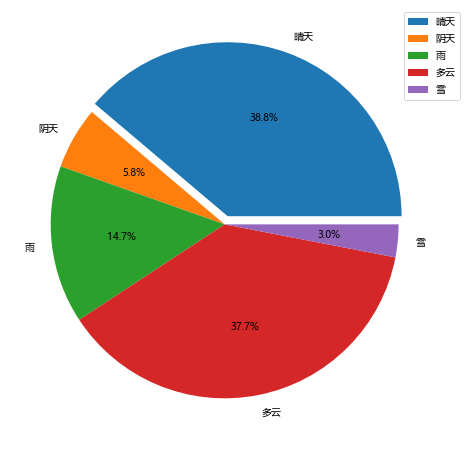

In [22]:
weather = df['天气'].values.tolist()

sun = 0  # 晴天
overcast = 0  # 阴天
rain = 0  # 雨
cloudy = 0  # 多云
snow = 0  # 雪

for e in weather:
    if re.search(r'晴', e):
        sun += 1
    if re.search(r'阴', e):
        overcast += 1
    if re.search(r'雨', e):
        rain += 1
    if re.search(r'多云', e):
        cloudy += 1
    if re.search(r'雪', e):
        snow += 1


res = [sun, overcast, rain, cloudy, snow]
count = sum(res)
percent = np.asarray(res) / count
plt.figure(figsize=(12, 8))
plt.pie(x=percent,
        labels=['晴天', "阴天", "雨", "多云", "雪"],
        autopct='%.1f%%',
        explode=[0.05, 0, 0, 0, 0],
        ) # 设置百分比的格式，这里保留一位小数)

plt.legend(loc='best', bbox_to_anchor=(0.9, 1))
plt.show()

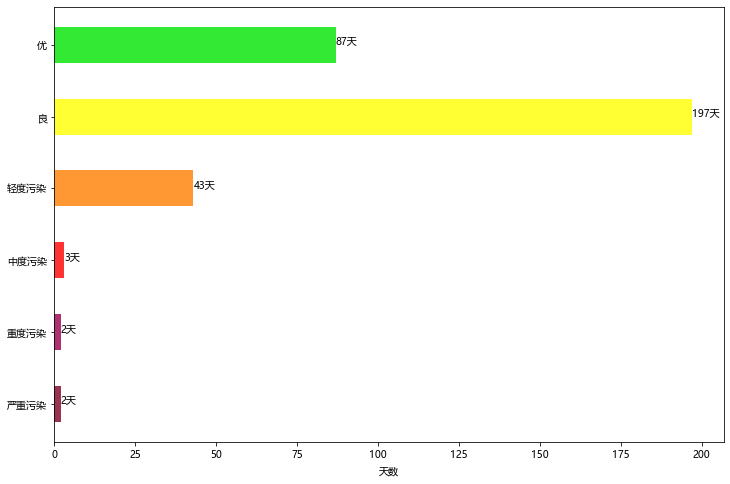

In [23]:
air = df.loc[2905:, '空气质量'].values.tolist()  # 2019-1-1开始一年的数据
labels = ["优", "良", "轻度污染", "中度污染", "重度污染", "严重污染"]

AQI = [0 for _ in range(6)]

for e in air:
    if e == "优":
        AQI[0] += 1
    elif e == "良":
        AQI[1] += 1
    elif e == "轻度污染":
        AQI[2] += 1
    elif e == "中度污染":
        AQI[3] += 1
    elif e == "重度污染":
        AQI[4] += 1
    elif e == "严重污染":
        AQI[5] += 1

colors = ['#01E400', '#FFFF00', '#FF7E00', '#FE0000', '#98004B', '#7E0123']
plt.figure(figsize=(12, 8))
plt.barh(range(6), AQI[::-1], color=colors[::-1], alpha=0.8, height=0.5)

for i in range(6):
    plt.text(AQI[5-i], i, str(AQI[5-i]) + "天")

plt.yticks(range(6), labels[::-1])
plt.xlabel("天数")
plt.show()

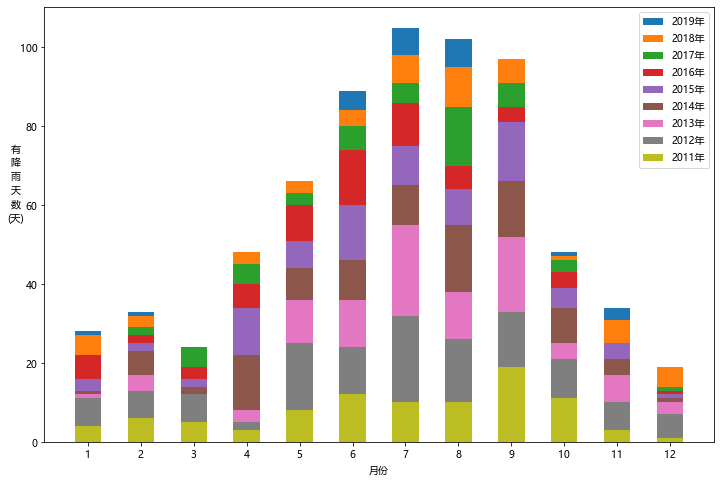

In [24]:
DATE = df['日期'].values.tolist()
weather = df['天气'].values.tolist()

point = [[0 for _ in range(12)] for _ in range(2011, 2020)]

for i in range(len(DATE)):
    if re.search(r'雨|雪', weather[i]):
        point[int(DATE[i][3:4]) - 1][int(DATE[i][5:7]) - 1] += 1

fig, ax = plt.subplots(figsize=(12, 8))

for year in range(9, 0, -1):
    data = np.zeros((12, ), dtype=np.int)
    for i in range(0, year):
        data += np.asarray(point[i])
    plt.bar(range(0, 12), data, label="201" + str(year) + "年", width=0.5)

plt.xlabel("月份")
plt.xticks(range(0, 12), range(1, 13))
plt.ylabel("有\n降\n雨\n天\n数\n(天)", rotation=0)
plt.legend()
plt.show()